In [107]:
%matplotlib inline

In [108]:
import numpy as np
import matplotlib.pyplot as plt

讀入tensorflow

In [109]:
import tensorflow as tf

# 1. 讀入 Fashion MNSIT數據集

In [110]:
from tensorflow.keras.datasets import fashion_mnist

In [111]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 2. 欣賞數據集內容 

In [112]:
len(x_train)

60000

In [113]:
len(x_test)

10000

In [114]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

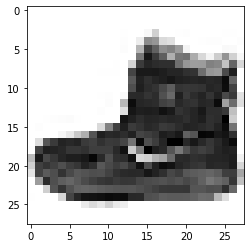

In [9]:
plt.imshow(x_train[0], cmap = "Greys")

In [115]:
type(y_train)

numpy.ndarray

看y有幾種類別

In [121]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

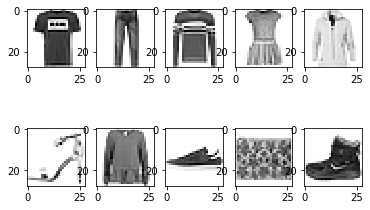

In [124]:
l = []
for i in set(y_train):
    n =  np.where(y_train == i)[0][0]
    l.append(n)
i = 1
for j in l:
    plt.subplot(2,5,i)
    plt.imshow(x_train[j].reshape(28,28), cmap="Greys")
    i += 1

# 3. 資料整理

In [125]:
print('max:' ,x_train[0].max())
print('min:' ,x_train[0].min())

max: 255
min: 0


In [126]:
x_train = x_train/255
x_test = x_test/255

In [127]:
x_train.shape

(60000, 28, 28)

變成一維矩陣

In [128]:
x_train = x_train.reshape(60000, 28*28)

In [129]:
x_test = x_test.reshape(10000, 28*28)

In [130]:
from tensorflow.keras.utils import to_categorical

In [131]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [132]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

打造神經網路

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [134]:
model = Sequential()

In [135]:
model.add(Dense(100, input_dim = 784, activation = "relu"))
#relu: 介於0~無線道之間，忽略負值

In [136]:
model.add(Dense(50, activation = "relu"))

In [137]:
model.add(Dense(10, activation = "softmax"))
#softmax: 介於0跟1之間，機率總和=1，適合多分類

# 4. 組裝神經網路

In [138]:
model.compile(loss = "categorical_crossentropy", optimizer = SGD(lr=0.5), metrics = ["accuracy"])
#categorical_crossentropy應用於多分類

In [139]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


# 5.訓練

In [140]:
model.fit(x_train, y_train, batch_size = 100, epochs = 50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 36us/sample - loss: 0.7156 - accuracy: 0.7338
Epoch 2/50
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4562 - accuracy: 0.8299
Epoch 3/50
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4092 - accuracy: 0.8486
Epoch 4/50
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3744 - accuracy: 0.8609
Epoch 5/50
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3544 - accuracy: 0.8675
Epoch 6/50
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3395 - accuracy: 0.8723
Epoch 7/50
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3285 - accuracy: 0.8764
Epoch 8/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3154 - accuracy: 0.8835
Epoch 9/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3080 - accuracy: 0.8839
Epoch 10/50
60

# 6.訓練結果

In [141]:
result = model.predict_classes(x_test)

In [142]:
result_train = model.evaluate(x_train, y_train, batch_size = 100)

60000/60000 [==============================] - 1s 23us/sample - loss: 0.1786 - accuracy: 0.9312s - loss: 0.179


In [143]:
result_test = model.evaluate(x_test, y_test, batch_size = 100)

10000/10000 [==============================] - 0s 18us/sample - loss: 0.4180 - accuracy: 0.8793


In [152]:
print("神經網路預測:", result[100])
print("實際值:", y_test[100])

神經網路預測: 3
實際值: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


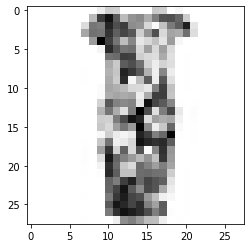

In [153]:
plt.imshow(x_test[100].reshape(28,28), cmap="Greys")